In [26]:
import pandas as pd
import numpy as np
import ffn
from datetime import datetime as dt
from datetime import timedelta
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import font_manager
from IPython.display import FileLink, FileLinks
import math

In [2]:
datafile = 'truecode-metrics-june-2023.csv'

In [3]:
FOA_START_DATE = dt.fromisoformat('2019-11-19')
FOA_END_DATE = dt.fromisoformat('2022-04-30')
FUND_START_DATE = dt.fromisoformat('2022-05-01')
FUND_END_DATE = dt.fromisoformat('2023-06-30')

# Font Configuration

If you receive an exception for Roboto Condensed or Roboto, stop here and fix the font configuration.

In [4]:
mpl.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

Fontconfig warning: line 146: blank doesn't take any effect anymore. please remove it from your fonts.conf


['/System/Library/Fonts/SFArabicRounded.ttf',
 '/Library/Fonts/Microsoft/Consolas Bold Italic.ttf',
 '/System/Library/Fonts/Supplemental/STIXSizOneSymBol.otf',
 '/System/Library/Fonts/Supplemental/Malayalam MN.ttc',
 '/System/Library/Fonts/Supplemental/Arial Black.ttf',
 '/Library/Fonts/ChaparralPro-Regular.otf',
 '/Library/Fonts/Microsoft/Arial Bold.ttf',
 '/System/Library/Fonts/Supplemental/STIXIntSmBol.otf',
 '/System/Library/Fonts/Supplemental/Wingdings.ttf',
 '/System/Library/Fonts/Supplemental/NotoSansWarangCiti-Regular.ttf',
 '/System/Library/Fonts/KohinoorTelugu.ttc',
 '/System/Library/Fonts/Supplemental/STIXIntDBol.otf',
 '/System/Library/Fonts/Avenir Next Condensed.ttc',
 '/System/Library/Fonts/SFNSItalic.ttf',
 '/Library/Fonts/Sensation-Regular.ttf',
 '/System/Library/Fonts/Supplemental/Kailasa.ttc',
 '/Library/Fonts/KozMinPro-Light.otf',
 '/System/Library/Fonts/Supplemental/Times New Roman Bold Italic.ttf',
 '/System/Library/Fonts/Supplemental/NotoSansLisu-Regular.ttf',
 '/

In [5]:
font_manager.findfont('Roboto Condensed')
font_manager.findfont('Roboto')

'/Users/jmp/Library/Fonts/Roboto-Regular.ttf'

# Configure Charts

In [6]:
%matplotlib inline
pd.options.display.float_format = '{:,.4f}'.format
sns.set_style("whitegrid")

mpl.rcParams.update({
                     'text.color' : "white",
                     'lines.linewidth': 4,
                     'font.size': 16.0,
                     'legend.facecolor': "182742",
                     'legend.edgecolor': 'CFB023',
                     'legend.fancybox': True,
                     'legend.framealpha': 1.,
                     'legend.loc': 'right',
                     'xtick.color': 'white',
                     'ytick.color': 'white',
                     'ytick.minor.visible': True,
                     'axes.facecolor': '#182742',
                     'axes.edgecolor': 'white',
                     'axes.grid': False,
                     'axes.axisbelow': 'line',
                     'grid.alpha': 0.3,
#                      'axes.grid.axis': 'y',
#                      'axes.grid.which': 'minor',
                     'axes.labelcolor' : "white",
                     'axes.labelsize': "24",
                     'axes.labelweight': "bold",
                     'axes.titlesize': 28,
                     'axes.titleweight': 'bold',
                     'axes.titlepad': 20,
                     'figure.facecolor': '#182742',
#                      'xtick.bottom': False,
                     'figure.figsize': [16, 9],
                     'font.sans-serif': ['Roboto Condensed', 'Roboto', 'Tahoma', 'DejaVu Sans', 'Lucida Grande', 'Verdana'],
                     'font.family': "sans-serif",
                    }
                   )
mpl.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'white',
          'axes.facecolor': '#182742',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
          'axes.grid.which

In [7]:
prices = pd.read_csv(datafile)
print(prices)
prices.Date = pd.to_datetime(prices.Date)
prices.index = prices.Date

          Date    Strategy     Bitcoin
0     12/19/19 10,000.0000 10,000.0000
1     12/20/19 10,036.1900 10,052.4900
2     12/21/19  9,981.8100  9,975.4600
3     12/22/19 10,342.4300 10,491.0800
4     12/23/19 10,163.9500 10,233.2600
...        ...         ...         ...
1285   6/26/23 49,055.8500 42,969.5400
1286   6/27/23 49,997.4700 43,572.1000
1287   6/28/23 48,781.7100 42,698.9800
1288   6/29/23 49,268.7200 43,224.1000
1289   6/30/23 50,055.4600 43,259.1600

[1290 rows x 3 columns]


In [8]:
prices[['Strategy', 'Bitcoin']]

,Strategy,Bitcoin
Date,,
2019-12-19,"10,000.0000","10,000.0000"
2019-12-20,"10,036.1900","10,052.4900"
2019-12-21,"9,981.8100","9,975.4600"
2019-12-22,"10,342.4300","10,491.0800"
2019-12-23,"10,163.9500","10,233.2600"
...,...,...
2023-06-26,"49,055.8500","42,969.5400"
2023-06-27,"49,997.4700","43,572.1000"
2023-06-28,"48,781.7100","42,698.9800"


# Fund Statistics

In [9]:
sample = prices[FUND_START_DATE:FUND_END_DATE]
stats = sample[['Strategy', 'Bitcoin']].calc_stats()
stats.display()

Stat                 Strategy    Bitcoin
-------------------  ----------  ----------
Start                2022-05-01  2022-05-01
End                  2023-06-30  2023-06-30
Risk-free rate       0.00%       0.00%

Total Return         2.27%       -17.80%
Daily Sharpe         0.20        0.01
Daily Sortino        0.32        0.01
CAGR                 1.95%       -15.51%
Max Drawdown         -32.35%     -59.64%
Calmar Ratio         0.06        -0.26

MTD                  -0.34%      11.99%
3m                   -13.55%     8.72%
6m                   22.17%      83.48%
YTD                  22.18%      84.21%
1Y                   10.83%      53.71%
3Y (ann.)            -           -
5Y (ann.)            -           -
10Y (ann.)           -           -
Since Incep. (ann.)  1.95%       -15.51%

Daily Sharpe         0.20        0.01
Daily Sortino        0.32        0.01
Daily Mean (ann.)    5.97%       0.33%
Daily Vol (ann.)     30.57%      48.68%
Daily Skew           0.47        -0.39
Daily Ku

/Users/jmp/code/truecode_metrics/graph-returns-fund.pdf

Text(0.5, 0.98, 'Return Histogram Matrix')

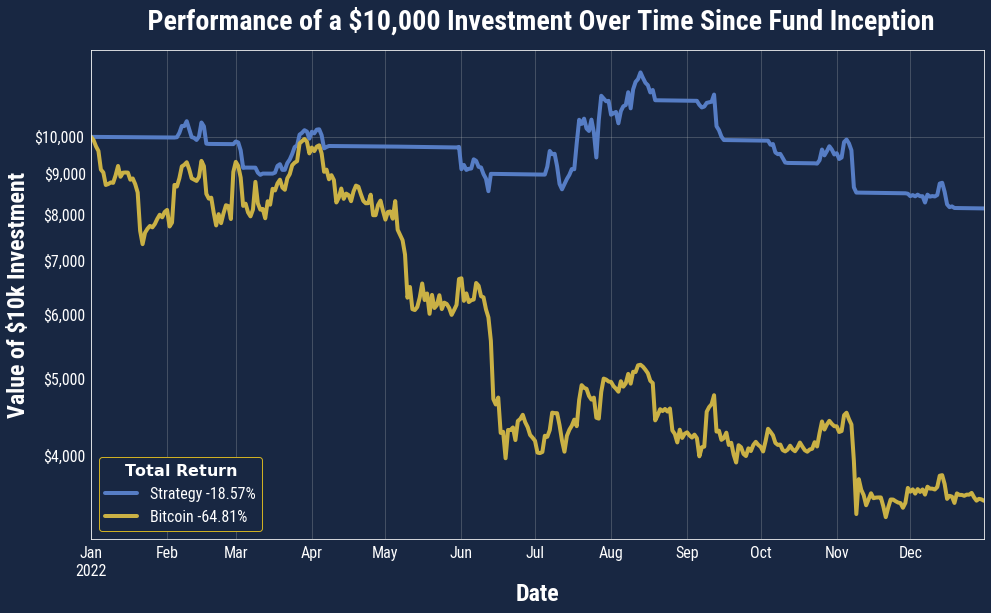

<Figure size 1152x648 with 0 Axes>

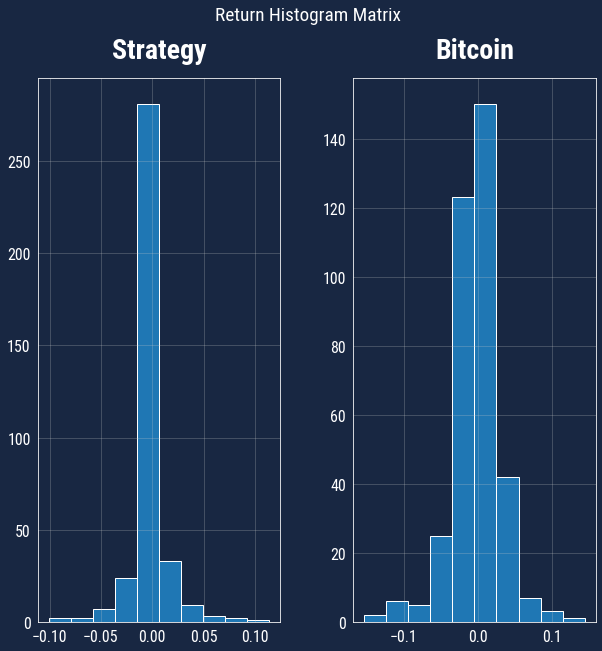

In [61]:
ax = sample[['Strategy', 'Bitcoin']].rebase(value=10000).plot.line(title=' Performance of a $10,000 Investment Over Time Since Fund Inception', logy=True, color={'Strategy': '#567DC5', 'Bitcoin': '#CAB145'}, xlabel="Date", ylabel="Value of $10k Investment")
sample_stats = sample[['Strategy', 'Bitcoin']].calc_stats()
strategy_total_return = sample_stats['Strategy'].stats['total_return']
bitcoin_total_return = sample_stats['Bitcoin'].stats['total_return']
ax.legend(('Strategy {:.2f}%'.format(strategy_total_return * 100.), 'Bitcoin {:.2f}%'.format(bitcoin_total_return * 100.)), loc='lower left', title=r'$\bf{Total\ Return}$')

ax.yaxis.set_major_formatter(lambda x, pos: f"${int(x):,.0f}")
ax.yaxis.set_minor_formatter(lambda x, pos: f"${int(x):,.0f}")
ax.yaxis.set_major_locator(mpl.ticker.LogLocator())
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True)

ax.get_figure().savefig('graph-returns-fund.pdf', format='pdf')
display(FileLink('graph-returns-fund.pdf'))



# Full History

In [11]:
stats = prices[['Strategy', 'Bitcoin']].calc_stats()
stats.display()

Stat                 Strategy    Bitcoin
-------------------  ----------  ----------
Start                2019-12-19  2019-12-19
End                  2023-06-30  2023-06-30
Risk-free rate       0.00%       0.00%

Total Return         400.55%     332.59%
Daily Sharpe         1.09        0.79
Daily Sortino        1.84        1.27
CAGR                 57.83%      51.44%
Max Drawdown         -32.35%     -76.28%
Calmar Ratio         1.79        0.67

MTD                  -0.34%      11.99%
3m                   -13.55%     8.72%
6m                   22.17%      83.48%
YTD                  22.18%      84.21%
1Y                   10.83%      53.71%
3Y (ann.)            71.24%      50.19%
5Y (ann.)            57.83%      51.44%
10Y (ann.)           -           -
Since Incep. (ann.)  57.83%      51.44%

Daily Sharpe         1.09        0.79
Daily Sortino        1.84        1.27
Daily Mean (ann.)    37.39%      46.41%
Daily Vol (ann.)     34.43%      58.76%
Daily Skew           0.49        -0.75


/Users/jmp/code/truecode_metrics/graph-returns-all.pdf

Text(0.5, 0.98, 'Return Histogram Matrix')

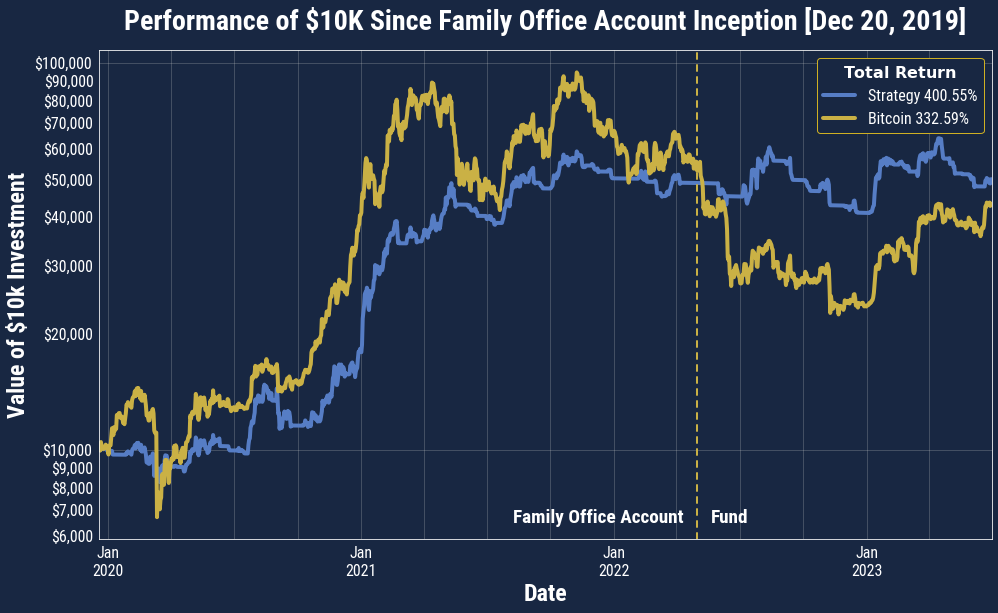

<Figure size 1152x648 with 0 Axes>

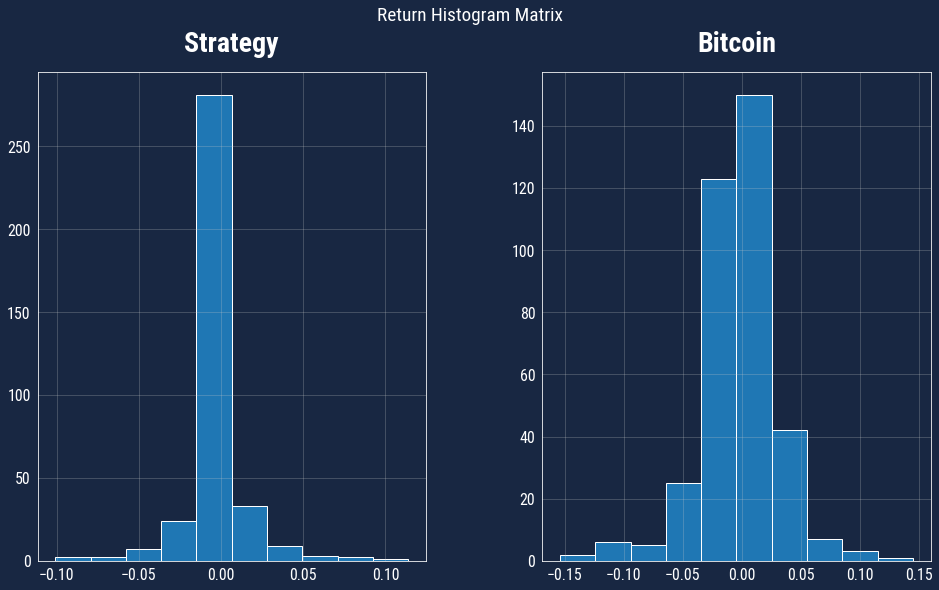

In [64]:
ax = prices[['Strategy', 'Bitcoin']].plot.line(title='Performance of $10K Since Family Office Account Inception [Dec 20, 2019]', logy=True, color={'Strategy': '#567DC5', 'Bitcoin': '#CAB145'}, xlabel="Date", ylabel="Value of $10k Investment")
strategy_total_return = stats['Strategy'].stats['total_return']
bitcoin_total_return = stats['Bitcoin'].stats['total_return']
ax.legend(('Strategy {:.2f}%'.format(strategy_total_return * 100.), 'Bitcoin {:.2f}%'.format(bitcoin_total_return * 100.)), loc='upper right', title=r'$\bf{Total\ Return}$')
ax.yaxis.set_major_formatter(lambda x, pos: f"${int(x):,.0f}")
ax.yaxis.set_minor_formatter(lambda x, pos: f"${int(x):,.0f}")
ax.axvline(dt(2022, 5, 1), color='#CAB145', label="Fund", dashes=(3, 3), dash_capstyle="round", linewidth=2)
ax.text(dt(2022, 5, 1) + timedelta(days=20), 6500,'Fund', rotation=0, color='#fff', fontweight='bold', fontsize='large')
ax.text(dt(2022, 5, 1) - timedelta(days=20), 6500,'Family Office Account', rotation=0, color='#fff', fontweight='bold', fontsize='large', horizontalalignment='right')
ax.yaxis.set_major_locator(mpl.ticker.LogLocator())
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1, 13, 3)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True)

ax.get_figure().savefig('graph-returns-all.pdf', format='pdf')
display(FileLink('graph-returns-all.pdf'))

sample_stats.plot_histograms(figsize=(16, 9))
# sample_stats.plot_scatter_matrix(figsize=(16, 9))

Stat                 Strategy    Bitcoin
-------------------  ----------  ----------
Start                2022-01-01  2022-01-01
End                  2022-12-31  2022-12-31
Risk-free rate       0.00%       0.00%

Total Return         -18.57%     -64.81%
Daily Sharpe         -0.37       -1.10
Daily Sortino        -0.55       -1.65
CAGR                 -18.62%     -64.94%
Max Drawdown         -32.33%     -66.43%
Calmar Ratio         -0.58       -0.98

MTD                  -4.13%      -3.62%
3m                   -17.71%     -14.83%
6m                   -9.29%      -16.55%
YTD                  -18.57%     -64.81%
1Y                   -           -
3Y (ann.)            -           -
5Y (ann.)            -           -
10Y (ann.)           -           -
Since Incep. (ann.)  -18.62%     -64.94%

Daily Sharpe         -0.37       -1.10
Daily Sortino        -0.55       -1.65
Daily Mean (ann.)    -10.34%     -58.06%
Daily Vol (ann.)     27.90%      52.95%
Daily Skew           0.26        -0.28
Dai

/Users/jmp/code/truecode_metrics/graph-returns-2022-bear-market.pdf

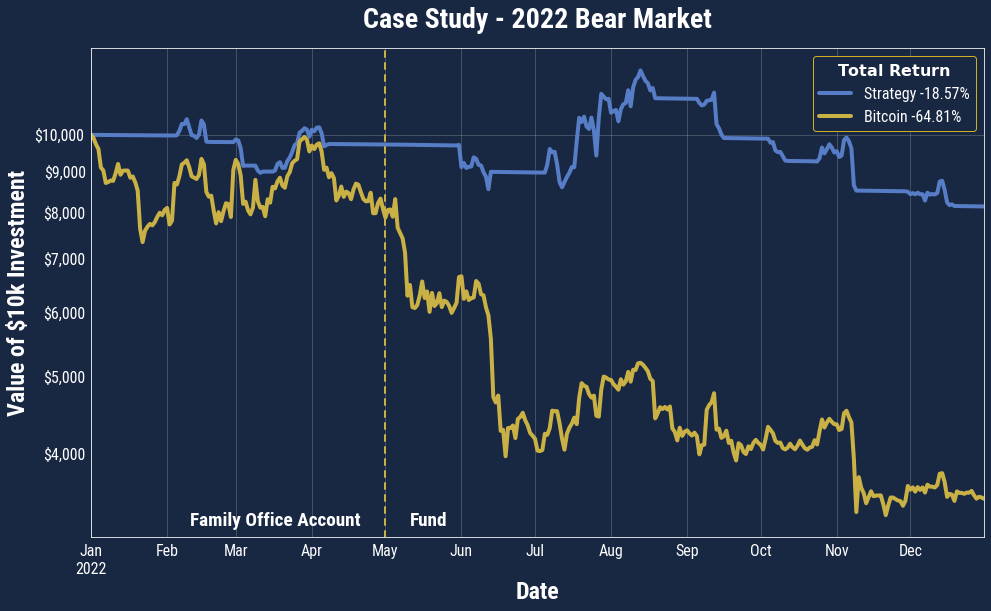

In [13]:
sample = prices[dt.fromisoformat('2022-01-01'):dt.fromisoformat('2022-12-31')]
rebased_sample = ffn.rebase(sample[['Strategy', 'Bitcoin']], value=10000)
ax = rebased_sample[['Strategy', 'Bitcoin']].plot.line(title='Case Study - 2022 Bear Market', logy=True, color={'Strategy': '#567DC5', 'Bitcoin': '#CAB145'}, xlabel="Date", ylabel="Value of $10k Investment")
rebased_sample_stats = rebased_sample[['Strategy', 'Bitcoin']].calc_stats()
rebased_sample_stats.display()
strategy_total_return = rebased_sample_stats['Strategy'].stats['total_return']
bitcoin_total_return = rebased_sample_stats['Bitcoin'].stats['total_return']
ax.legend(('Strategy {:.2f}%'.format(strategy_total_return * 100.), 'Bitcoin {:.2f}%'.format(bitcoin_total_return * 100.)), loc='upper right', title=r'$\bf{Total\ Return}$')

ax.yaxis.set_major_formatter(lambda x, pos: f"${int(x):,.0f}")
ax.yaxis.set_minor_formatter(lambda x, pos: f"${int(x):,.0f}")
ax.axvline(dt(2022, 5, 1), color='#CAB145', label="Fund", dashes=(3, 3), dash_capstyle="round", linewidth=2)
ax.text(dt(2022, 5, 1) + timedelta(days=10), 3250,'Fund', rotation=0, color='#fff', fontweight='bold', fontsize='large')
ax.text(dt(2022, 5, 1) - timedelta(days=10), 3250,'Family Office Account', rotation=0, color='#fff', fontweight='bold', fontsize='large', horizontalalignment='right')
ax.yaxis.set_major_locator(mpl.ticker.LogLocator())
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13, 1)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True)

ax.get_figure().savefig('graph-returns-2022-bear-market.pdf', format='pdf')
display(FileLink('graph-returns-2022-bear-market.pdf'))


/Users/jmp/code/truecode_metrics/drawdowns.pdf

/Users/jmp/code/truecode_metrics/drawdowns.csv

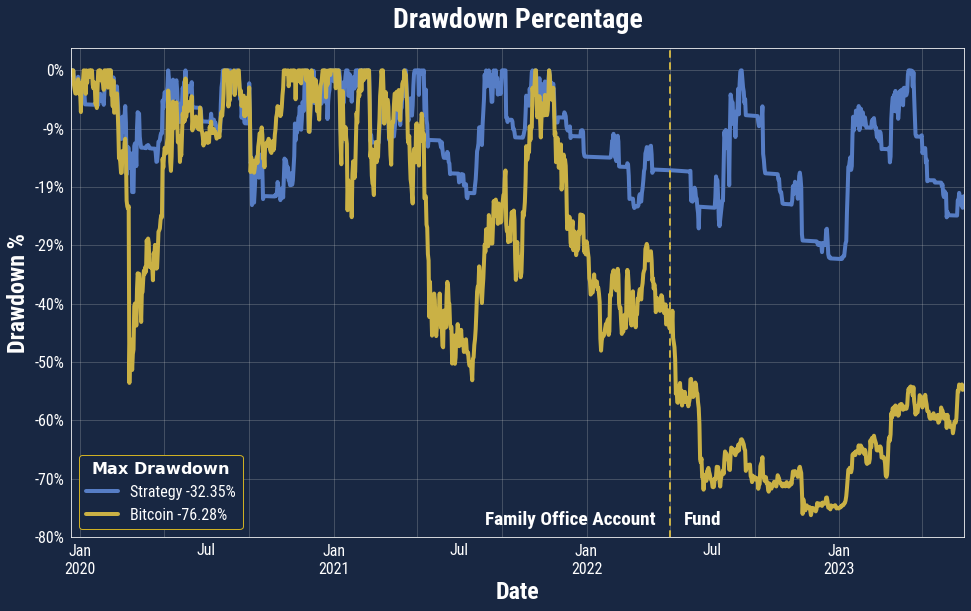

In [14]:
rebased_sample = ffn.rebase(prices[['Strategy', 'Bitcoin']], value=10000)
drawdowns = rebased_sample.to_drawdown_series()
ax = drawdowns.plot(ylabel='Drawdown %', title='Drawdown Percentage', color={'Strategy': '#567DC5', 'Bitcoin': '#CAB145'})
rebased_drawdown_stats = rebased_sample[['Strategy', 'Bitcoin']].calc_stats()
# rebased_drawdown_stats.display()
strategy_max_drawdown = rebased_drawdown_stats['Strategy'].stats['max_drawdown']
bitcoin_max_drawdown = rebased_drawdown_stats['Bitcoin'].stats['max_drawdown']
ax.legend(('Strategy {:.2f}%'.format(strategy_max_drawdown * 100.), 'Bitcoin {:.2f}%'.format(bitcoin_max_drawdown * 100.)), loc='lower left', title=r'$\bf{Max\ Drawdown}$')

ax.axvline(dt(2022, 5, 1), color='#CAB145', label="Fund", dashes=(3, 3), dash_capstyle="round", linewidth=2)
ax.text(dt(2022, 5, 1) + timedelta(days=20), -.78,'Fund', rotation=0, color='#fff', fontweight='bold', fontsize='large')
ax.text(dt(2022, 5, 1) - timedelta(days=20), -.78,'Family Office Account', rotation=0, color='#fff', fontweight='bold', fontsize='large', horizontalalignment='right')
fig = ax.get_figure()
ax.yaxis.set_major_formatter(lambda x, pos: f"{int(x * 100)}%")

ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13, 4)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True)

fig.savefig('drawdowns.pdf')
display(FileLink('drawdowns.pdf'))

drawdowns.to_csv('drawdowns.csv')
display(FileLink('drawdowns.csv'))



In [15]:
# strategy_monthly_returns = prices.groupby([prices.Date.dt.year, prices.Date.dt.month])['Strategy'].apply(pd.DataFrame.pct_change, freq='M')
strategy_monthly_returns = prices['Strategy'].pct_change(freq='M')

strategy_monthly_returns.to_csv("strategy_monthly_returns.csv")
strategy_monthly_returns

Date
2019-12-19       NaN
2019-12-20       NaN
2019-12-21       NaN
2019-12-22       NaN
2019-12-23       NaN
               ...  
2023-06-26       NaN
2023-06-27       NaN
2023-06-28       NaN
2023-06-29       NaN
2023-06-30   -0.0034
Name: Strategy, Length: 1290, dtype: float64

# Calculate VaR

Bitcoin VaR = -0.05689777956479967
Strategy VaR = -0.031997864820484924


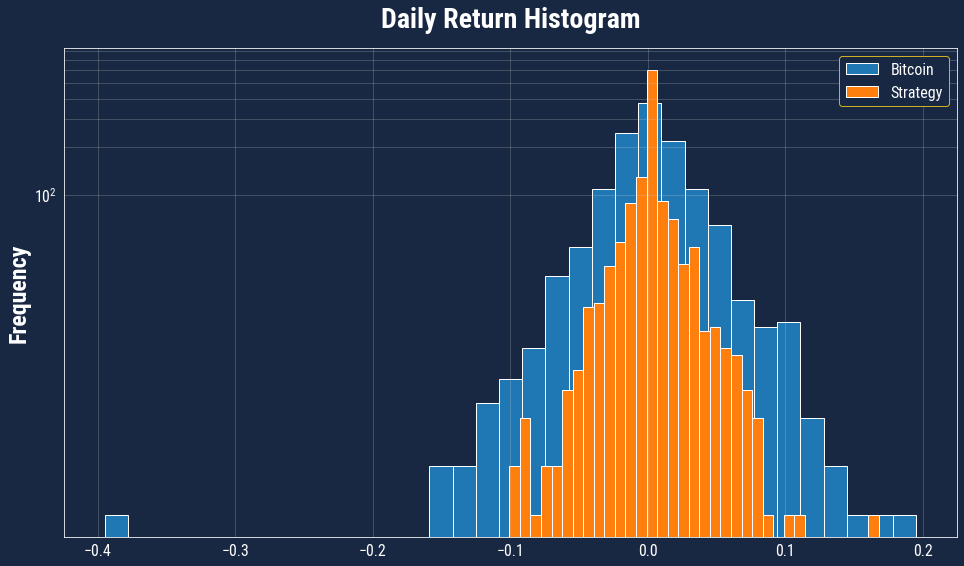

In [58]:
bitcoin_daily_returns = prices['Bitcoin'].pct_change(freq="D")
strategy_daily_returns = prices['Strategy'].pct_change(freq="D")

VaR_95_bitcoin = bitcoin_daily_returns.quantile(0.05)
VaR_95_strategy = strategy_daily_returns.quantile(0.05)

print('Bitcoin VaR =', VaR_95_bitcoin)
print('Strategy VaR =', VaR_95_strategy)

ax = bitcoin_daily_returns.plot(kind='hist', logy=True, legend=True, title='Daily Return Histogram', bins=int(math.sqrt(len(bitcoin_daily_returns))))
strategy_daily_returns.plot(kind='hist', logy=True, legend=True, bins=int(math.sqrt(len(strategy_daily_returns))))

ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(integer=True))
# ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13, 4)))
# ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True)



# Calculate Correlation

In [ ]:
corr = prices[['Strategy', 'Bitcoin']].corr()
corr

In [ ]:
strategy_corr = corr[['Strategy']].loc['Bitcoin'].iloc[0]
print("Strategy Correlation = {:.4}".format(strategy_corr))

# Calculate Volatility & Beta

In [ ]:
strategy_vol = stats['Strategy'].stats['yearly_vol']
benchmark_vol = stats['Bitcoin'].stats['yearly_vol']
print("Strategy Volatility = {:.4}".format(strategy_vol))
print("Bitcoin Volatility = {:.4}".format(benchmark_vol))

# Calculate Beta

In [ ]:
beta = strategy_corr * (strategy_vol / benchmark_vol)
print("Strategy Beta = {:.4}".format(beta))